# Best model selection

In [ ]:
# Getting MAE for training, validation, and test sets for a linear regression model

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# 1. Cargar dataset
X, y = load_diabetes(return_X_y=True)

# 2. Dividir el dataset en train (60%), validation (20%) y test (20%)
# Primero, separamos train (60%) y temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Ahora separamos temp en val (20%) y test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predecir en cada conjunto
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 5. Calcular MAE para cada conjunto
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

# 6. Mostrar resultados
print(f"MAE - Training Set:   {mae_train:.2f}")
print(f"MAE - Validation Set: {mae_val:.2f}")
print(f"MAE - Test Set:       {mae_test:.2f}")

MAE - Training Set:   44.29
MAE - Validation Set: 38.22
MAE - Test Set:       46.72


In [ ]:
# Now, let's extend the code to include polynomial regression with a degree of 2

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1. Load dataset
X, y = load_diabetes(return_X_y=True)

# 2. Split dataset into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Define polynomial degree
degree = 2  # You can change this to try different complexities

# 4. Create pipeline with polynomial features and linear regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linreg', LinearRegression())
])

# 5. Train the model
model.fit(X_train, y_train)

# 6. Make predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 7. Calculate MAE for each dataset
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

# 8. Print results
print(f"Polynomial Degree: {degree}")
print(f"MAE - Training Set:   {mae_train:.2f}")
print(f"MAE - Validation Set: {mae_val:.2f}")
print(f"MAE - Test Set:       {mae_test:.2f}")

Polynomial Degree: 2
MAE - Training Set:   38.47
MAE - Validation Set: 47.28
MAE - Test Set:       47.08


In [ ]:
# Evaluate polynomial model function

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def evaluate_polynomial_model(X_train, y_train, X_val, y_val, X_test, y_test, degree):
    """
    Trains a polynomial regression model and returns MAE for train, validation, and test sets.
    """
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)
    y_test_pred  = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)
    mae_test  = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_val, mae_test

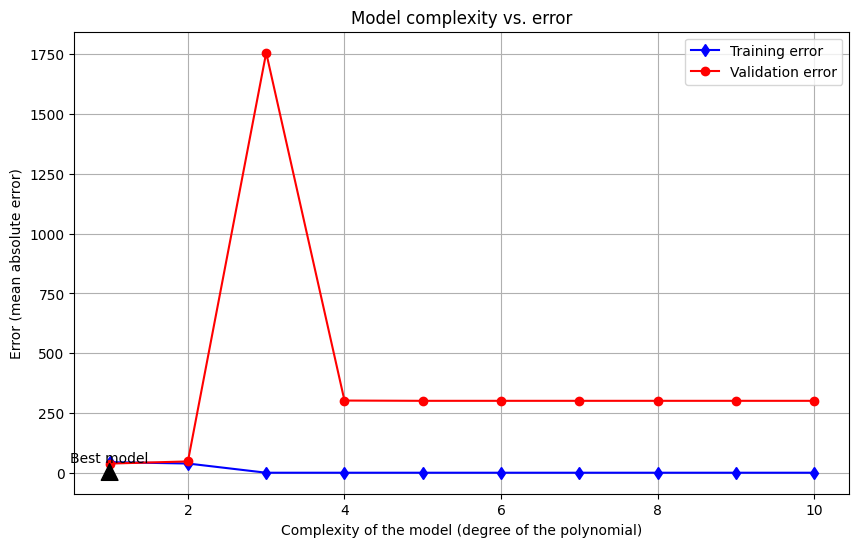

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load and split dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ranges of degrees to test
degrees = range(1, 11)

mae_train_list = []
mae_val_list = []
mae_test_list = []

# Evaluate for each degree
for d in degrees:
    mae_train, mae_val, mae_test = evaluate_polynomial_model(X_train, y_train, X_val, y_val, X_test, y_test, d)
    mae_train_list.append(mae_train)
    mae_val_list.append(mae_val)
    mae_test_list.append(mae_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_train_list, 'b-d', label='Training error')
plt.plot(degrees, mae_val_list, 'r-o', label='Validation error')
plt.xlabel("Complexity of the model (degree of the polynomial)")
plt.ylabel("Error (mean absolute error)")
plt.title("Model complexity vs. error")
plt.legend()
plt.grid(True)

# Mark best validation error
# Note that we are assuming the best model is the one with the lowest validation error
# It's better to check the graph to identify the best model (human interpretation)
# If you see, for example, that the model with the smallest validation error is still quite complex, 
# and that there is a much simpler model that has only a slightly higher validation error, you may be more inclined to pick that one. 
# A great data scientist is one who can combine these theoretical tools with their knowledge about the use case to build the best and most effective models.
best_degree = degrees[mae_val_list.index(min(mae_val_list))]
plt.annotate("Best model", 
             xy=(best_degree, min(mae_val_list)), 
             xytext=(best_degree, min(mae_val_list)+5),
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()